In [1]:
import pandas as pd 
import statsmodels.api as sm
affairs_df=sm.datasets.fair.load_pandas().data
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [2]:
affairs_df['affairs_binary']=affairs_df['affairs']>0

In [3]:
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_binary
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True


In [4]:
affairs_df.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_binary
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affairs_binary,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


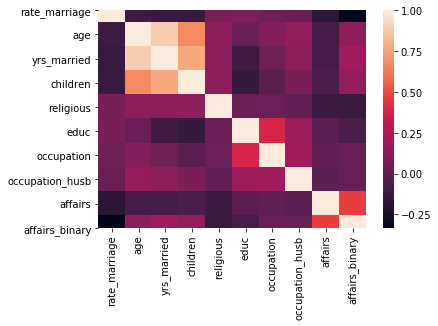

In [5]:
import seaborn as sns
sns.heatmap(affairs_df.corr())

In [6]:
affair_X = affairs_df.drop(['affairs', 'affairs_binary'], axis=1)
affair_Y = affairs_df['affairs_binary']

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [8]:
model = DecisionTreeClassifier()
scores = cross_val_score(model,affair_X,affair_Y,cv=10)
print(scores.mean())
print(scores.std())

0.6581874371562074
0.019623783077644383


In [9]:
model.fit(affair_X, affair_Y)
pd.DataFrame({
    'feature': affair_X.columns,
    'importance': model.feature_importances_
}).sort_values('importance').tail(3)

,feature,importance
3,children,0.131253
0,rate_marriage,0.141660
7,occupation_husb,0.177357


In [10]:
# get dummy Varibles
# 用分离的数值变量替换用数字表示的分类变量
# 全零表示第一个分类，所以可以减少1列
occuptation_dummies = pd.get_dummies(affairs_df['occupation'],prefix='职业分类_').iloc[:,1:]

In [11]:
affairs_df=pd.concat([affairs_df,occuptation_dummies],axis=1)

In [12]:
occuptation_dummies = pd.get_dummies(affairs_df['occupation_husb'],prefix='丈夫职业分类_').iloc[:,1:]
affairs_df=pd.concat([affairs_df,occuptation_dummies],axis=1)

In [13]:
affair_X = affairs_df.drop(['affairs', 'affairs_binary','occupation','occupation_husb'], axis=1)
affair_Y = affairs_df['affairs_binary']

In [14]:
print(affairs_df.head())

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  affairs_binary  职业分类__2.0  职业分类__3.0  职业分类__4.0  \
0              5.0  0.111111            True          1          0          0   
1              4.0  3.230769            True          0          1          0   
2              5.0  1.400000            True          0          1          0   
3              5.0  0.727273            True          0          0          0   
4              4.0  4.666666            True          0          1          0   

   职业分类__5.0  职业分类__6.0  丈夫职业分类__2.0  丈夫职业分类

In [15]:
affairs_df.shape

(6366, 20)

In [16]:
model = DecisionTreeClassifier()
scores = cross_val_score(model,affair_X,affair_Y,cv=10)
print(scores.mean())
print(scores.std())

0.650489442242858
0.02235965236078896


In [17]:
model.fit(affair_X, affair_Y)
pd.DataFrame({
    'feature': affair_X.columns,
    'importance': model.feature_importances_
}).sort_values('importance')

,feature,importance
10,职业分类__6.0,0.006334
6,职业分类__2.0,0.012717
12,丈夫职业分类__3.0,0.019947
8,职业分类__4.0,0.022875
7,职业分类__3.0,0.024462
15,丈夫职业分类__6.0,0.024849
9,职业分类__5.0,0.024947
11,丈夫职业分类__2.0,0.033282
14,丈夫职业分类__5.0,0.041844
13,丈夫职业分类__4.0,0.044248
